In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn

In [2]:
m_data = pd.read_csv('IMDb movies.csv')

C:\Users\LEGION\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
m_data.shape

(85855, 22)

In [4]:
m_data.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [5]:
m_data.isna().sum()

imdb_title_id                0
title                        0
original_title               0
year                         0
date_published               0
genre                        0
duration                     0
country                     64
language                   833
director                    87
writer                    1572
production_company        4455
actors                      69
description               2115
avg_vote                     0
votes                        0
budget                   62145
usa_gross_income         70529
worlwide_gross_income    54839
metascore                72550
reviews_from_users        7597
reviews_from_critics     11797
dtype: int64

In [6]:
m_data.shape

(85855, 22)

In [7]:
m_data = m_data[m_data['country'].notna()]
m_data['country'] = m_data['country'].map(lambda x : x.replace(', ',' '))
m_data['original_title'] = m_data['original_title'].str.lower()

In [8]:
m_data = m_data.loc[m_data['country'].str.contains('USA') | m_data['country'].str.contains('UK') | m_data['country'].str.contains('Australia')]
m_data['country']

0               USA
1         Australia
3               USA
5               USA
9        France USA
            ...    
85832        UK USA
85837           USA
85838           USA
85839           USA
85846            UK
Name: country, Length: 40842, dtype: object

In [9]:
m_data = m_data.loc[:,['imdb_title_id','original_title','year','genre','director','actors','avg_vote']]

In [10]:
m_data.shape

(40842, 7)

In [11]:
m_data = m_data.reset_index(drop=True)
m_data['year'] = m_data['year'].map(lambda x : str(x))

<AxesSubplot:>

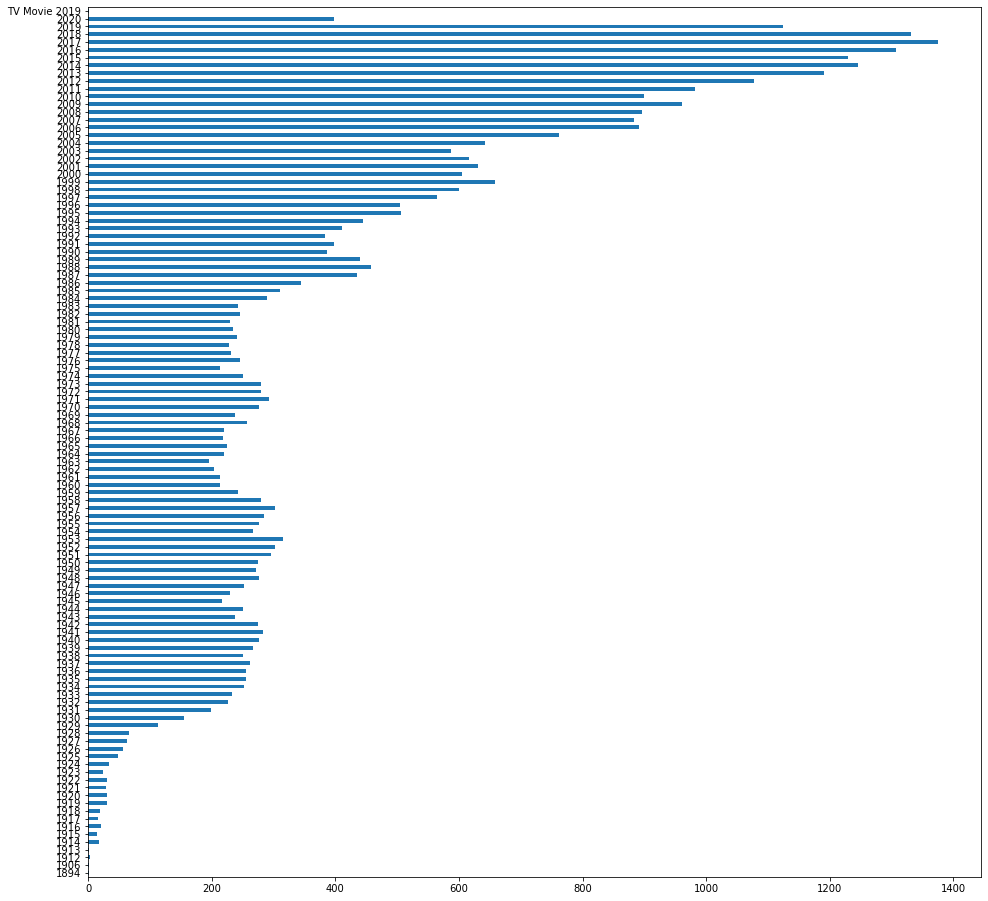

In [12]:
m_data['year'].value_counts().sort_index().plot(kind='barh',figsize=(16,16))

In [13]:
# m_data['genre'][134].replace(', ',' ')
# m_data['actors'][134].replace(', ',' ')
m_data['year'] = m_data['year'].map(lambda x : int(x.split('TV Movie ')[-1]))
m_data = m_data.loc[m_data['year']>1999]

In [14]:
m_data.shape

(19639, 7)

In [15]:
m_data.year.value_counts().sort_index()

2000     605
2001     631
2002     616
2003     587
2004     642
2005     762
2006     891
2007     884
2008     897
2009     961
2010     900
2011     982
2012    1078
2013    1191
2014    1245
2015    1229
2016    1308
2017    1376
2018    1331
2019    1126
2020     397
Name: year, dtype: int64

In [16]:
m_data = m_data.reset_index(drop=True)

m_data['actors'] = m_data['actors'].map(lambda x : str(x).split(', '))

In [17]:
m_data['cast_size'] = m_data['actors'].map(lambda x : len(x))

In [18]:
m_data['cast_size'].value_counts()

15    16342
14      426
13      406
12      384
11      347
10      327
9       309
8       249
7       236
6       180
5       143
3        95
4        92
1        60
2        43
Name: cast_size, dtype: int64

In [19]:
m_data = m_data.loc[m_data['cast_size']==15]

In [20]:
m_data['actors'] = m_data['actors'].map(lambda x : " ".join(x))

In [21]:
m_data['director'].fillna('Unknown',inplace=True)

In [22]:
m_data['comb'] = m_data['director']+' '+m_data['actors']+' '+m_data['genre']

In [23]:
m_data.isna().sum()

imdb_title_id     0
original_title    0
year              0
genre             0
director          0
actors            0
avg_vote          0
cast_size         0
comb              0
dtype: int64

In [24]:
m_data.to_csv('final_movies.csv')

In [25]:
print('x-men' in list(m_data['original_title']))

True


In [26]:
m_data.shape

(16342, 9)